In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a simulator in 2D

In [2]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [3]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [4]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = -sin(t)
    uy = cos(t)
    return array([ux, uy])

### Running the simulator

In [5]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([2., 1.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

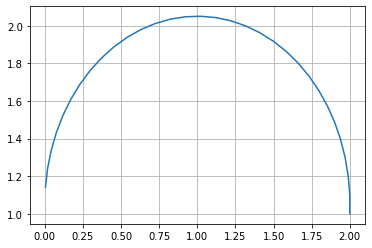

In [6]:
grid()
plot(x_log[:,0], x_log[:,1])

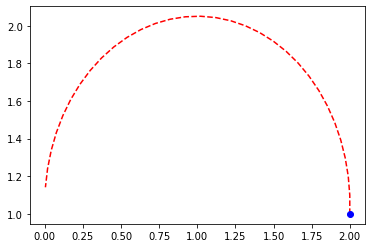

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())